In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table as Tb
%matplotlib notebook

In [2]:
from scipy import stats

In [3]:
with open('Sample_0012022-07-01 10.47.08.042_A0000 test.csv') as f:
    df = pd.read_csv(f)
df

,Protocol Time Stamp(s),Data channel 1 (µm),Data channel 2 (µm),State channel 1
0,2022-07-01 10:47:07.996327,1200.28729,2137.05266,0
1,2022-07-01 10:47:08.005928,1200.28729,2137.05266,0
2,2022-07-01 10:47:08.015527,1200.28598,2137.05266,0
3,2022-07-01 10:47:08.025127,1200.28598,2137.05266,0
4,2022-07-01 10:47:08.034727,1200.28598,2137.05266,0
...,...,...,...,...
227402,2022-07-01 11:23:31.051289,1145.37472,2137.05266,0
227403,2022-07-01 11:23:31.060889,1145.37258,2137.05266,0
227404,2022-07-01 11:23:31.070489,1145.37472,2137.05266,0
227405,2022-07-01 11:23:31.080089,1145.37472,2137.05266,0


In [4]:
time = pd.to_datetime(df["Protocol Time Stamp(s)"])

In [5]:
deltaTime = time - time[0]

<IPython.core.display.Javascript object>


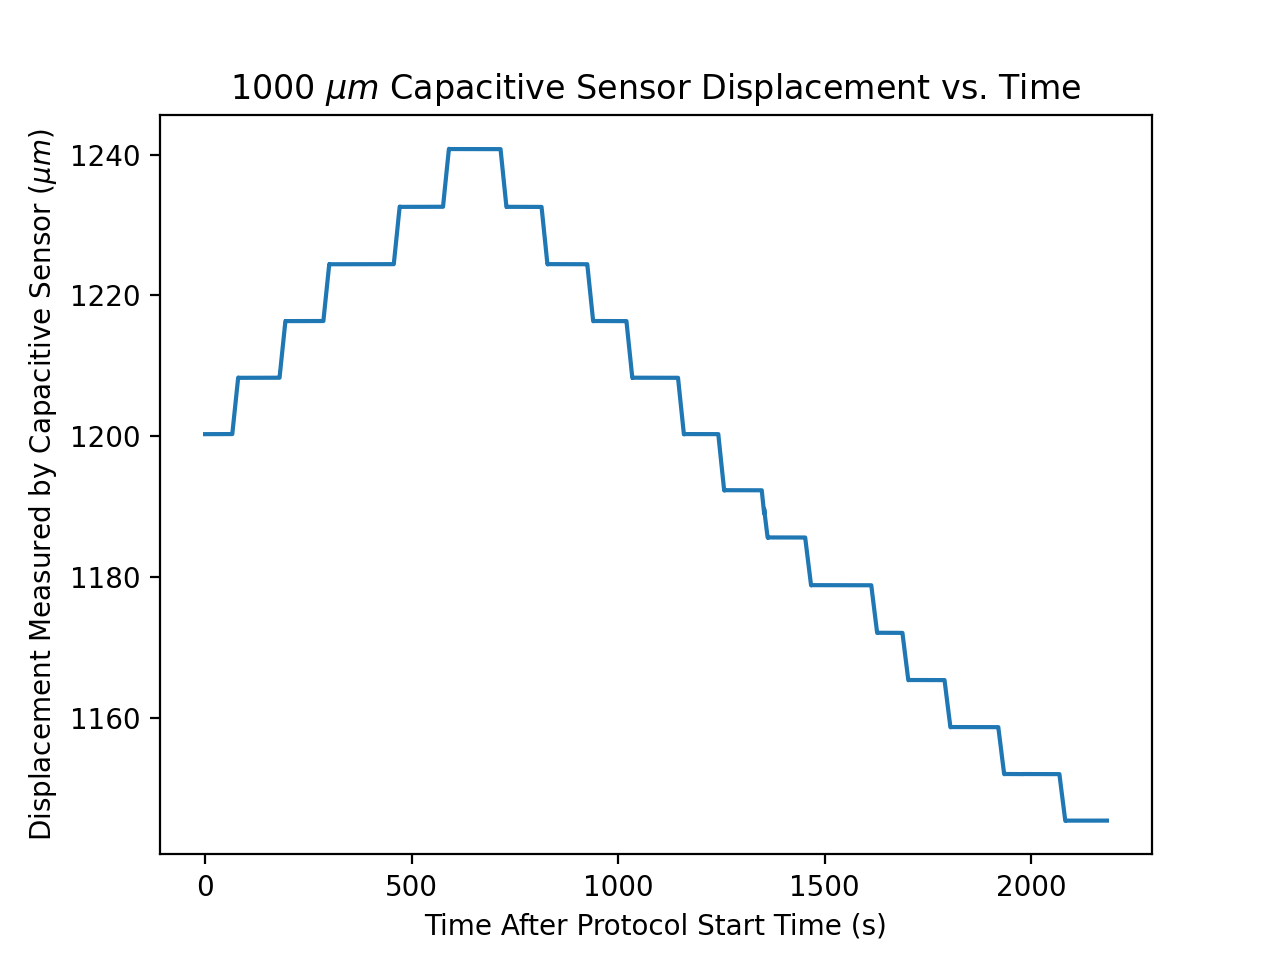

Text(0.5, 1.0, '1000 $\\mu m$ Capacitive Sensor Displacement vs. Time')

In [6]:
plt.figure()
plt.plot(deltaTime.dt.total_seconds(),df[" Data channel 1 (µm)"])

plt.xlabel('Time After Protocol Start Time (s)')
plt.ylabel('Displacement Measured by Capacitive Sensor $(\mu m)$')
plt.title('1000 $\mu m$ Capacitive Sensor Displacement vs. Time')

<IPython.core.display.Javascript object>


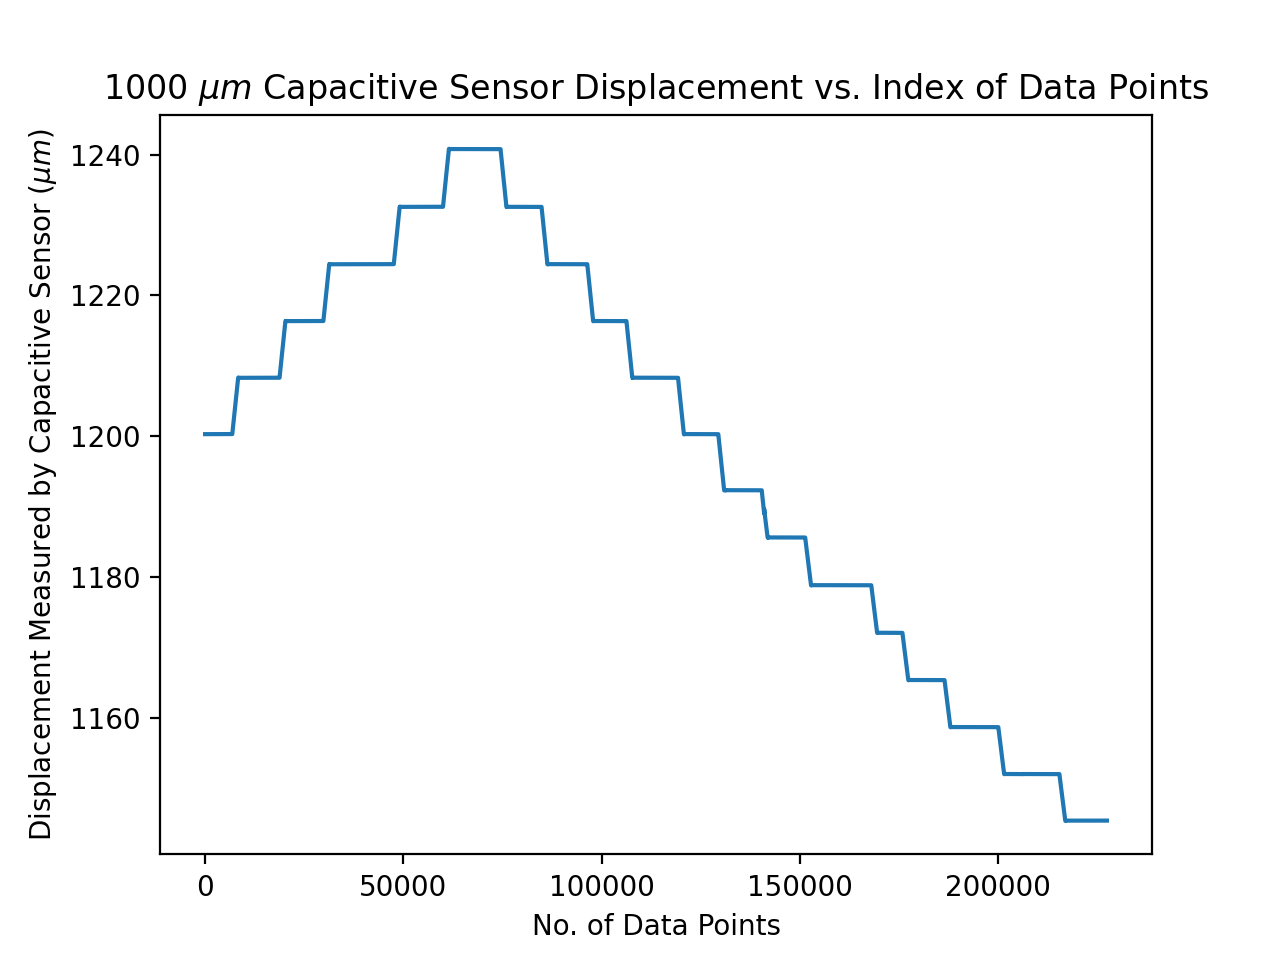

Text(0.5, 1.0, '1000 $\\mu m$ Capacitive Sensor Displacement vs. Index of Data Points')

In [7]:
plt.figure()
plt.plot(df[" Data channel 1 (µm)"])

plt.xlabel('No. of Data Points')
plt.ylabel('Displacement Measured by Capacitive Sensor $(\mu m)$')
plt.title('1000 $\mu m$ Capacitive Sensor Displacement vs. Index of Data Points')

In [10]:
start=89000
end=96000

In [11]:
print(df[" Data channel 1 (µm)"][start:end].mean())
print(df[" Data channel 1 (µm)"][start:end].std())

1224.447958975768
0.001596662836229355


In [12]:
y = df[" Data channel 1 (µm)"][start:end]
x = (time[start:end] - time[start]).dt.total_seconds()

In [13]:
info = stats.linregress(x,y)
info

LinregressResult(slope=1.2478004893503198e-05, intercept=1224.4475397754723, rvalue=0.15161450566389137, pvalue=2.8672242467038433e-37, stderr=9.724507346596036e-07, intercept_stderr=3.772496664549561e-05)

<IPython.core.display.Javascript object>


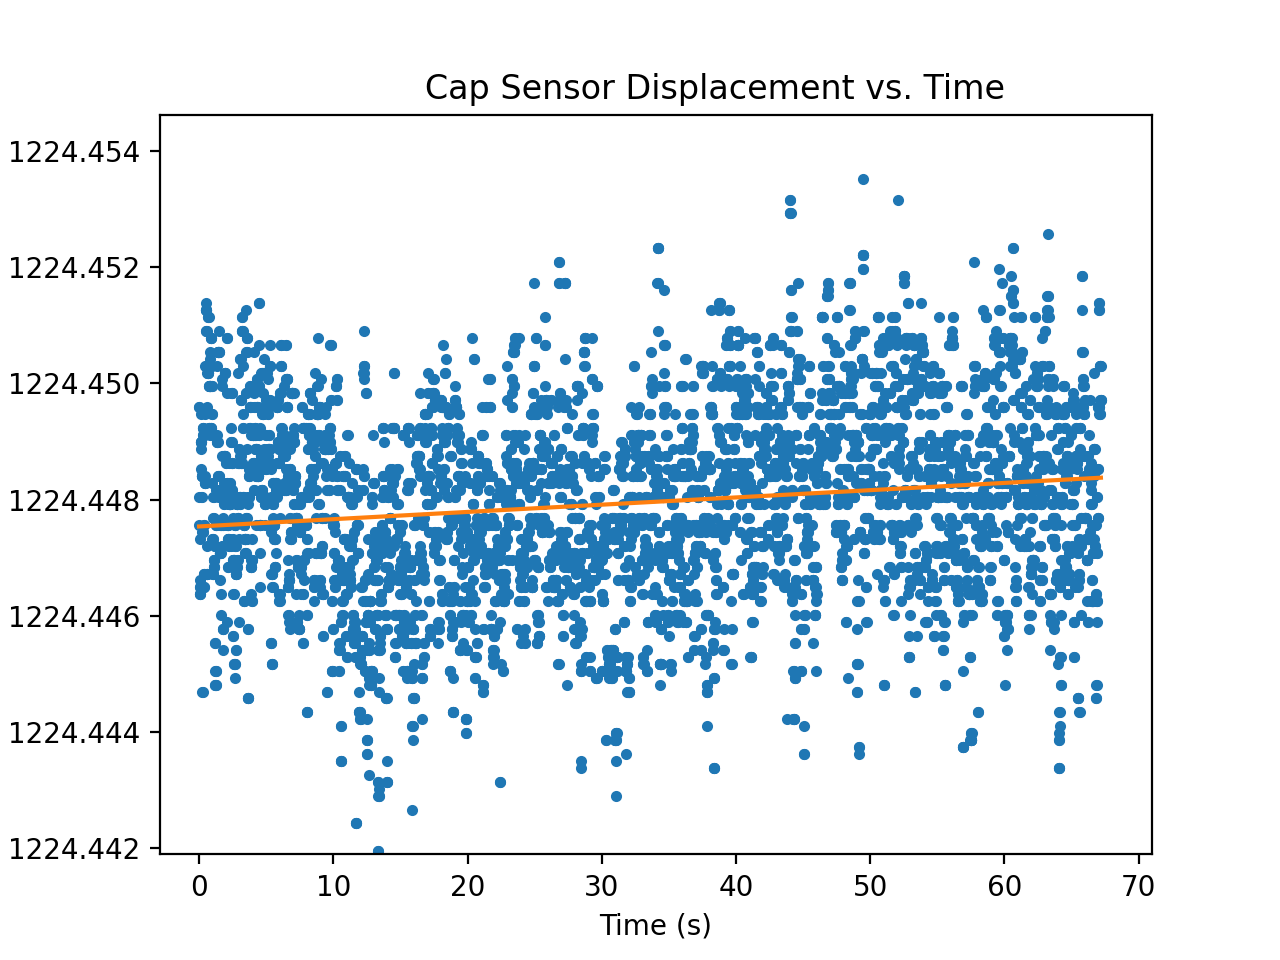

In [15]:
plt.figure()
plt.plot((time[start:end] - time[start]).dt.total_seconds(),df[" Data channel 1 (µm)"][start:end],".")
plt.plot(x,x*info.slope+info.intercept)

plt.xlabel('Time (s)')
plt.ylabel('Displacement Measured by Capacitive Sensor $(\mu m)$')
plt.title('           Cap Sensor Displacement vs. Time')

plt.ticklabel_format(useOffset=False)